# SM Truth pairing

**Goal:** To start to understand how good the jet pairing algorithm is, let's look into how efficient it is at pairing the correc bs to the correct hs!

I already started looking into this with my `Truth-Pairing` notebook, but now I'm refining these studies, and I also wanted to focus on the SM NR signal since this is the reason why I'm excited about the 4b analyss!


In [1]:
from root_numpy import root2array 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from GraphNN.utils import calcMinDr

from ROOT import TLorentzVector

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.14/04


In [2]:
# mini Ntuple

fDir = "/eos/user/h/hartman/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/"
fName = "user.bstanisl.17142219._000*.MiniNTuple.root"
#fName = "user.bstanisl.17142219._000001.MiniNTuple.root" # for lower stats
myFiles = fDir + fName

treeName = "XhhMiniNtuple"

reco_branches = ['nresolvedJets',
                 'resolvedJets_E',
                 'resolvedJets_pt',
                 'resolvedJets_phi',
                 'resolvedJets_eta',
                 'resolvedJets_MV2c10',
                 'resolvedJets_HadronConeExclTruthLabelID',
                 'resolvedJets_is_MV2c10_FixedCutBEff_70',
                 'resolvedJets_SF_MV2c10_FixedCutBEff_70']

truth_branches = ['ntruth','truth_E','truth_pt','truth_phi','truth_eta',
                  'truth_pdgId','truth_status','truth_barcode',
                  'truth_is_higgs','truth_is_bhad',
                  'truth_Bdecay_x','truth_Bdecay_y','truth_Bdecay_z',
                  'truth_nParents','truth_parent_pdgId','truth_parent_barcode','truth_parent_status',
                  'truth_nChildren','truth_child_pdgId','truth_child_barcode','truth_child_status',
                  'truth_mtt']

branches = reco_branches + truth_branches

dfs = []
for i, myFile in enumerate(glob.glob(myFiles)):

    print('{}. {}\n'.format(i+1,myFile))
    
    evtNum = root2array(myFile, treeName,branches='eventNumber')
    arr = root2array(myFile, treeName,branches=branches)
    df = pd.DataFrame(arr,index=evtNum,columns=branches)
    dfs.append(df)
    

1. /eos/user/h/hartman/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/user.bstanisl.17142219._000001.MiniNTuple.root

2. /eos/user/h/hartman/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/user.bstanisl.17142219._000002.MiniNTuple.root

3. /eos/user/h/hartman/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/user.bstanisl.17142219._000003.MiniNTuple.root

4. /eos/user/h/hartman/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/user.bstanisl.17142219._000004.MiniNTuple.root

5. /eos/user/h/hartman/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/user.bstanisl.17142219._000005.MiniNTuple.root

6. /eos/user/h/hartman/hh4b/SMNR/user.bs

In [3]:
miniNtuple = pd.concat(dfs)

In [4]:
miniNtuple.head()

nresolvedJets                                     resolvedJets_E  \
40739              2                              [677.12646, 1059.223]   
40163              3                   [798.3063, 574.86237, 300.39264]   
41060              4        [332.30634, 159.15305, 59.98805, 40.633472]   
40442              4         [162.84279, 193.44376, 93.52923, 36.31572]   
41228              5  [466.19662, 543.2707, 265.7253, 182.87335, 115...   

                                         resolvedJets_pt  \
40739                               [588.0453, 579.3407]   
40163                    [791.1165, 464.3366, 232.55708]   
41060         [147.45953, 88.04104, 56.32844, 39.388454]   
40442       [127.40005, 124.975105, 33.84356, 25.972086]   
41228  [246.36624, 155.88022, 113.32287, 40.853405, 2...   

                                        resolvedJets_phi  \
40739                            [-2.5618055, 0.6231163]   
40163                 [-2.6043737, 0.3295059, 1.1299155]   
41060        [0.927532, -1.56455, -2.5730417, 1.4593184]   
40442    [0.57681996, 3.1098607, -1.6357211, -1.2673761]   
41228  [1.1791837, -1.7850189, -2.0658934, 0.01506485...   

                                        resolvedJets_eta  \
40739                             [0.51808804, 1.205011]   
40163              [0.12467092, 0.65790606, -0.74447787]   
41060   [-1.4509578, 1.1960713, 0.29143357, -0.18117625]   
40442    [0.72739094, -1.0013676, -1.6736112, 0.8470351]   
41228  [1.2513815, 1.9191765, 1.4938614, -2.178477, 2...   

                                     resolvedJets_MV2c10  \
40739                            [0.14294185, 0.9990325]   
40163                [0.9471009, 0.9965211, -0.86409456]   
41060    [0.9529924, 0.5983589, -0.38932443, 0.95944446]   
40442    [0.9999902, 0.99818254, 0.9965793, -0.82864904]   
41228  [0.999651, -0.8264987, -0.17109534, -0.7111994...   

      resolvedJets_HadronConeExclTruthLabelID  \
40739                                  [5, 5]   
40163                               [5, 5, 0]   
41060                            [5, 5, 0, 5]   
40442                            [5, 5, 5, 0]   
41228                         [5, 0, 5, 0, 5]   

      resolvedJets_is_MV2c10_FixedCutBEff_70  \
40739                                 [0, 1]   
40163                              [1, 1, 0]   
41060                           [1, 0, 0, 1]   
40442                           [1, 1, 1, 0]   
41228                        [1, 0, 0, 0, 1]   

                  resolvedJets_SF_MV2c10_FixedCutBEff_70  ntruth    ...     \
40739  [[1.2274467, 1.1484944, 1.306399, 1.1180204, 1...       6    ...      
40163  [[0.86880744, 0.9143476, 0.8232673, 0.9319252,...       6    ...      
41060  [[0.96149653, 0.97749233, 0.94550073, 0.968099...       6    ...      
40442  [[0.9654378, 0.9813023, 0.94957334, 0.9702543,...       6    ...      
41228  [[0.9655553, 0.98736745, 0.94374317, 0.9880484...       6    ...      

                                          truth_Bdecay_z      truth_nParents  \
40739  [-999999.0, -999999.0, -999999.0, -999999.0, -...  [1, 1, 1, 1, 1, 1]   
40163  [-999999.0, -999999.0, -999999.0, -999999.0, -...  [1, 1, 1, 1, 1, 1]   
41060  [-999999.0, -999999.0, -999999.0, -999999.0, -...  [1, 1, 1, 1, 1, 1]   
40442  [-999999.0, -999999.0, -999999.0, -999999.0, -...  [1, 1, 1, 1, 1, 1]   
41228  [-999999.0, -999999.0, -999999.0, -999999.0, -...  [1, 1, 1, 1, 1, 1]   

                         truth_parent_pdgId  \
40739  [[25], [25], [25], [25], [25], [25]]   
40163  [[25], [25], [25], [25], [25], [25]]   
41060  [[25], [25], [25], [25], [25], [25]]   
40442  [[25], [25], [25], [25], [25], [25]]   
41228  [[25], [25], [25], [25], [25], [25]]   

                                    truth_parent_barcode  \
40739  [[10009], [10010], [10061], [10062], [10062], ...   
40163  [[10045], [10018], [10019], [10046], [10046], ...   
41060  [[10028], [10027], [10085], [10084], [10084], ...   
40442  [[10016], [10073], [10017], [10074], [10074], ..

In [5]:
miniNtuple.ntruth.min(),miniNtuple.ntruth.max()

(6, 6)

In [6]:
miniNtuple.index.shape

(696817,)

When I run over *all* of the SM NR files from the Feb 2019 production, there are about 700k events. I'm not sure if this was what I expected, because I thought Max said on Mattermost there should be 4 million... Why might this be lower?

In [7]:
# micro Ntuple
sigDir = "../../hh4b-resolved-reconstruction/btagStudies/"
treeName = "afterPairing"
arr = root2array(sigDir + "SM_NR.root", treeName, selection='ntag >= 4')
SR = pd.DataFrame(arr,index=arr['event_number'].astype(int))

In [8]:
SR.tail()

run_number  event_number  ntag  njets     mc_sf   event_m_hh  \
571995      284500        571995     4      6  0.000025   684.278675   
572354      284500        572354     4      4  0.000003  1310.015451   
572995      284500        572995     4      6  0.000002  1442.241102   
572878      284500        572878     4      6  0.000013   960.883987   
572875      284500        572875     4      4  0.000033   674.284644   

        event_pt_hh  event_m_h1   event_E_h1  event_pT_h1     ...       \
571995    91.855325   98.150529   371.527725   264.819184     ...        
572354    26.830441  113.569837   781.652122   637.997298     ...        
572995   167.346177  128.360321  2211.405045   524.704711     ...        
572878    45.942320  144.593435  1292.360138   440.699700     ...        
572875    83.146708  123.673263   401.898087   357.781945     ...        

        event_angle_h2_j2  event_tag_h1_j1  event_tag_h1_j2  event_tag_h2_j1  \
571995           2.180885             True             True             True   
572354           1.100328             True             True             True   
572995           1.213167             True             True             True   
572878           1.176371             True             True             True   
572875           1.466863             True             True             True   

        event_tag_h2_j2  rwgt_pT_4   rwgt_pT_2  rwgt_eta_i  rwgt_dRjj_1  \
571995             True  70.510574  113.604362    0.843732     0.683208   
572354             True  82.611954  469.345490    0.442597     0.436486   
572995             True  53.691967  302.970581    1.119301     0.577718   
572878             True  89.623772  300.522552    1.330333     0.606352   
572875             True  94.981216  184.385301    0.547257     0.711321   

        rwgt_dRjj_2  
571995     1.178097  
572354     0.478583  
572995     0.769180  
572878     0.675591  
572875     0.742735  

[5 rows x 50 columns]

In [9]:
arr['event_number'].shape

(58893,)

So after the paring, there are only 60k signal events... this is actually *higher* than I was expecting, but I think I would need to use the mc weights to get a more accurate estimate of whether the cutflow in the paper is consistent with this code.

In [10]:
# Add new rows for the values that you want to calculate
SR['dr_j0'] = 0
SR['dr_j1'] = 0
SR['dr_j2'] = 0
SR['dr_j3'] = 0

SR['pt_j0'] = 0
SR['pt_j1'] = 0
SR['pt_j2'] = 0
SR['pt_j3'] = 0

SR['dpt_reco_true_h1'] = 0
SR['dpt_reco_true_h2'] = 0

SR['dr_true_h1_h2'] = 0
SR['dr_reco_true_h1'] = 0
SR['dr_reco_true_h2'] = 0
SR['dr_reco_h1_h2'] = 0

SR['dr_reco_true_b11'] = 0
SR['dr_reco_true_b12'] = 0
SR['dr_reco_true_b21'] = 0
SR['dr_reco_true_b22'] = 0

SR['dr_true_b11_b12'] = 0
SR['dr_true_b21_b22'] = 0

# This is a reco level quanity, but I'm just going to plot
# it here since I'll have the 4-vectors anyways
SR['dr_reco_b11_b12'] = 0
SR['dr_reco_b21_b22'] = 0


In [11]:
hcVars = ['event_pT_h1', 'event_eta_h1', 'event_phi_h1', 'event_m_h1', 
          'event_pT_h2', 'event_eta_h2', 'event_phi_h2', 'event_m_h2']

jetVars = ['event_pT_h1_j1', 'event_eta_h1_j1', 'event_phi_h1_j1', 'event_m_h1_j1',   
           'event_pT_h1_j2', 'event_eta_h1_j2', 'event_phi_h1_j2', 'event_m_h1_j2', 
           'event_pT_h2_j1', 'event_eta_h2_j1', 'event_phi_h2_j1', 'event_m_h2_j1',   
           'event_pT_h2_j2', 'event_eta_h2_j2', 'event_phi_h2_j2', 'event_m_h2_j2']

cols = hcVars + jetVars

**Notation:** 
- Let `p` denote the reco 4-vectors and `q` denote the truth 4-vectors.
- bij is the jet in HC i, jth highest in pT

In [12]:
keys = ['h1', 'h2', 'b11', 'b12', 'b21', 'b22']
bNames = ['h1', 'h2', 'h1_j1', 'h1_j2', 'h2_j1', 'h2_j2']

In [13]:
njets = 4
R = 0.3

for ievt, (pt_h1, eta_h1, phi_h1, m_h1, pt_h2, eta_h2, phi_h2, m_h2,\
    pt_b11, eta_b11, phi_b11, m_b11, pt_b12, eta_b12, phi_b12, m_b12,\
    pt_b21, eta_b21, phi_b21, m_b21, pt_b22, eta_b22, phi_b22, m_b22) in SR[cols].iterrows():
    
    # Reconstruct the 4-vectors
    p = {key : TLorentzVector() for key in keys}
    q = {key : TLorentzVector() for key in keys}
    
    # Reco 4-vectors
    p['h1'].SetPtEtaPhiM(pt_h1, eta_h1, phi_h1, m_h1)
    p['h2'].SetPtEtaPhiM(pt_h2, eta_h2, phi_h2, m_h2)
    
    p['b11'].SetPtEtaPhiM(pt_b11, eta_b11, phi_b11, m_b11)
    p['b12'].SetPtEtaPhiM(pt_b12, eta_b12, phi_b12, m_b12)
    p['b21'].SetPtEtaPhiM(pt_b21, eta_b21, phi_b21, m_b21)
    p['b22'].SetPtEtaPhiM(pt_b22, eta_b22, phi_b22, m_b22)
    
    # Truth 4-vectors: Need to loop over the corresponding list of truth particles in the event
    tpts = miniNtuple.loc[ievt,'truth_pt']
    tetas = miniNtuple.loc[ievt,'truth_eta']
    tphis = miniNtuple.loc[ievt,'truth_phi']
    tEs = miniNtuple.loc[ievt,'truth_E']
    
    tpdgs = miniNtuple.loc[ievt,'truth_pdgId']
    
    tbarcodes = miniNtuple.loc[ievt,'truth_barcode']
    tChildBarcodes = miniNtuple.loc[ievt,'truth_child_barcode']
    

    '''
    See these selections have allowed you to choose the correct jets in the event
    '''
    # Calculate the distances between all of the b-quarks w/ the selected jets
    #R = np.zeros((4,4)) 
    
    js = [p['b11'], p['b12'], p['b21'], p['b22']]
    
    bs = [TLorentzVector() for i in range(njets)]
    bmask = (np.abs(tpdgs) == 5)
    for ib, pt,eta,phi,E in zip(range(njets), tpts[bmask],tetas[bmask],tphis[bmask],tEs[bmask]):
        bs[ib].SetPtEtaPhiE(pt,eta,phi,E)    
    dr_match, jidx = calcMinDr(js,bs, R=R)
    SR.loc[ievt,'dr_j0'], SR.loc[ievt,'dr_j1'], SR.loc[ievt,'dr_j2'], SR.loc[ievt,'dr_j3'] = dr_match
    
    # Also, save the pts for the jet which matches to these quarks
    jpts = np.array([pt_b11, pt_b12, pt_b21, pt_b22])
    SR.loc[ievt,'pt_j0'], SR.loc[ievt,'pt_j1'], SR.loc[ievt,'pt_j2'], SR.loc[ievt,'_j3'] = jpts[jidx]
    
    '''
    Find how often you have the correct pairing
    '''
    # Reconstruct the truth Higgs candidates, labelling them with a dr match to reco
    hmask = (tpdgs == 25)
    pt1, pt2 = tpts[hmask]
    eta1, eta2 = tetas[hmask]
    phi1, phi2 = tphis[hmask]
    E1, E2 = tEs[hmask]
    
    q1 = TLorentzVector()
    q2 = TLorentzVector()
    
    q1.SetPtEtaPhiE(pt1,eta1,phi1,E1)
    q2.SetPtEtaPhiE(pt2,eta2,phi2,E2)
    qs = [q1, q2]
    
    _, q['h1'], h1_cbar = min([ (p['h1'].DeltaR(qi), qi, bars) for qi,bars in zip(qs,tChildBarcodes[hmask])])
    _, q['h2'], h2_cbar = min([ (p['h2'].DeltaR(qi), qi, bars) for qi,bars in zip(qs,tChildBarcodes[hmask])])
    
    
    # Get the children for each of the higgses using a barcode match
    HCs_const = [ [p['b11'],p['b12']], [p['b21'],p['b22']] ]
    for i_HC, childBarcodes, hc_jets in zip([1,2], [h1_cbar,h2_cbar], HCs_const):
        
        qs = [TLorentzVector(), TLorentzVector()]
        
        for jb, childBarcode in enumerate(childBarcodes):
            ic = np.where(childBarcode==tbarcodes)[0][0]
            qs[jb].SetPtEtaPhiE(tpts[ic],tetas[ic],tphis[ic],tEs[ic])
            
        # Next: Assign truth-quarks to b-jets using at dR match
        dr_match, qidx = calcMinDr(hc_jets,qs, R=R)
        
        q['b{}1'.format(i_HC)] = qs[qidx[0]]
        q['b{}2'.format(i_HC)] = qs[qidx[1]]
                    
            
    # Fill the df with these calculated values
    SR.loc[ievt,'dpt_reco_true_h1'] = q['h1'].Pt() - p['h1'].Pt()
    SR.loc[ievt,'dpt_reco_true_h2'] = q['h2'].Pt() - p['h2'].Pt()

    SR.loc[ievt,'dr_true_h1_h2'] = q['h1'].DeltaR(q['h2'])
    SR.loc[ievt,'dr_reco_true_h1'] = p['h1'].DeltaR(q['h1'])
    SR.loc[ievt,'dr_reco_true_h2'] = p['h2'].DeltaR(q['h2'])
    SR.loc[ievt,'dr_reco_h1_h2'] = p['h1'].DeltaR(p['h2'])
    
    SR.loc[ievt,'dr_reco_true_b11'] = p['b11'].DeltaR(q['b11'])
    SR.loc[ievt,'dr_reco_true_b12'] = p['b12'].DeltaR(q['b12'])
    SR.loc[ievt,'dr_reco_true_b21'] = p['b21'].DeltaR(q['b21'])
    SR.loc[ievt,'dr_reco_true_b22'] = p['b22'].DeltaR(q['b22'])

    # Calculate the truth angles 
    SR.loc[ievt,'dr_true_b11_b12'] = q['b11'].DeltaR(q['b12'])
    SR.loc[ievt,'dr_true_b21_b22'] = q['b21'].DeltaR(q['b22'])

    SR.loc[ievt,'dr_reco_b11_b12'] = p['b11'].DeltaR(p['b12'])
    SR.loc[ievt,'dr_reco_b21_b22'] = p['b21'].DeltaR(p['b22'])
    

Waring: Multiple rows are dr matched to the same col
D [[0.81887569 0.18455097]
 [0.38059978 0.27608587]]
dr_match [0.18455097 0.27608587]
idx [1 1]
Should maybe consider setting dr_match to an unphysically large value.

Waring: Multiple rows are dr matched to the same col
D [[1.15463105 2.60368865 1.83924192 0.08869916]
 [0.00414801 2.96599141 2.87803212 1.22858743]
 [3.01628503 0.18267448 0.97914108 2.46653877]
 [2.94836198 0.23299541 1.39046936 2.76516489]]
dr_match [0.08869916 0.00414801 0.18267448 0.23299541]
idx [3 0 1 1]
Should maybe consider setting dr_match to an unphysically large value.

Waring: Multiple rows are dr matched to the same col
D [[0.18267448 0.97914108]
 [0.23299541 1.39046936]]
dr_match [0.18267448 0.23299541]
idx [0 0]
Should maybe consider setting dr_match to an unphysically large value.

Waring: Multiple rows are dr matched to the same col
D [[0.82539125 2.7343361  0.04329064 2.28602198]
 [0.00665358 2.81789572 0.85453383 3.02499327]
 [2.64603592 0.28432809 

**Study 1**

We noticed in a first pass over the values in the Ntuple that the lower $p_T$ HC had a lower mass. Michael said this could be because the subleading HC could have been
- Not as well reconstructed
- Be some calibration effect.

The scaling of the 4-vectors of the HC to the Higgs mass helps correct for this effect. 

Looking at $p_T^{true} - p_T^{reco}$ for each of the HCs can give us a handle on if this is in fact the main issue for these unscaled masses.

In [14]:
figDir = 'figures/SM_NR/'

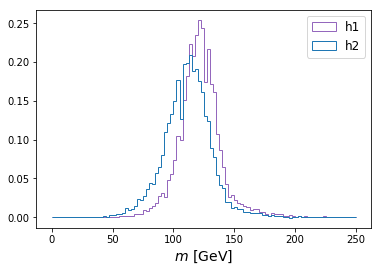

In [15]:
for h,c in zip(['h1','h2'],['C4','C0']):
    plt.hist(SR['event_m_'+h], weights=SR.mc_sf,
             bins=100,range=(0,250), 
             label=h, 
             color=c,histtype='step')
plt.xlabel('$m$ [GeV]',fontsize=14)
plt.legend(fontsize=12)
plt.savefig('{}/{}_m_HC1_HC2.pdf'.format(figDir,treeName),bbox_inches='tight')
plt.show()

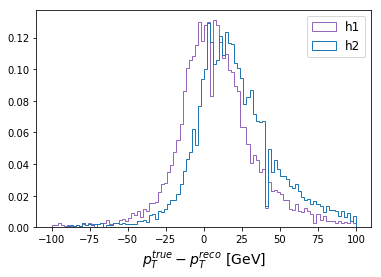

In [16]:
for h,c in zip(['h1','h2'],['C4','C0']):
    plt.hist(SR['dpt_reco_true_'+h], weights=SR.mc_sf,
             bins=100,range=(-100,100), 
             label=h, 
             color=c,histtype='step')
plt.xlabel('$p_T^{true} - p_T^{reco}$ [GeV]',fontsize=14)
plt.legend(fontsize=12)
plt.savefig('{}/{}dpt_reco_true_HCs.pdf'.format(figDir,treeName),bbox_inches='tight')
plt.show()

**Thoughts:**
- Yes, this was exactly the effect that we're trying to probe
- The subleading Higgs is more often has a more incorrect $p_T$, and in particular, it's more often to be missing energy.

**Study 2:** How often do we get the correct jets?

First look at the $\Delta R$s between the chosen jet and the closest b-quarks.

For this version of the plot, I don't have any requirement on the HC or higgs parents for matching the bs and jets.

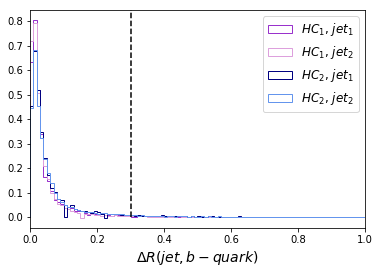

In [17]:
for ij, label, c in zip(range(njets), ['$HC_1$, $jet_1$','$HC_1$, $jet_2$','$HC_2$, $jet_1$','$HC_2$, $jet_2$'],
                        ['darkorchid','plum','navy','cornflowerblue']):
    plt.hist(SR['dr_j{}'.format(ij)].values, weights=SR.mc_sf.values,
             bins=100,range=(0,1), label=label, 
             color=c,histtype='step')#,log=True)
    
plt.xlabel('$\Delta R(jet,b-quark)$ ',fontsize=14)
plt.legend(fontsize=12)

ylim = plt.ylim()
plt.plot([R,R],[0,1e3],'k--')
plt.ylim(ylim)

plt.xlim(0,1)

#plt.savefig(figDir+'dR_jet_quark.pdf')

plt.show()

In [18]:
SR['dr_match_max'] = pd.Series(np.max(SR[['dr_j0','dr_j1','dr_j2','dr_j3']].values,axis=-1),index=SR.index)

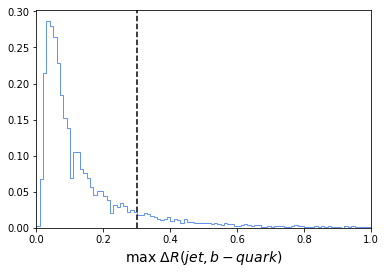

In [19]:
plt.hist(SR['dr_match_max'], weights=SR.mc_sf,
             bins=100,range=(0,1), 
             color=c,histtype='step')
plt.xlabel('max $\Delta R(jet,b-quark)$ ',fontsize=14)

_,ymax = plt.ylim()
plt.plot([R,R],[0,1e3],'k--')
plt.ylim(0,ymax)

plt.xlim(0,1)

plt.show()


In [20]:
# Also get the reco pts corresponding to this dr match
indices = np.argmax(SR[['dr_j0','dr_j1','dr_j2','dr_j3']].values,axis=-1)

jpts = SR[['pt_j0','pt_j1','pt_j2','pt_j3']].values
nEvts = jpts.shape[0]
SR['reco_pt_mismatch'] = pd.Series(jpts[range(nEvts),indices],index=SR.index)

In [21]:
# Since the order of the reco jet pts already matched the ordering of the bs 
# in the truth list, we don't have to do anything too fancy here
tpts = np.vstack(miniNtuple.loc[SR.index,'truth_pt'].values)
tpdgs = np.vstack(miniNtuple.loc[SR.index,'truth_pdgId'].values)

val = tpts[np.abs(tpdgs) == 5].reshape(nEvts,4)
SR['true_pt_mismatch'] = pd.Series(val[range(nEvts),indices],index=SR.index)

In [22]:
# If the mc weights didn't vary by event, this is how we could calculate this
print('Events with missed b-jet: {:0.2f}%'.format(100*np.sum(SR['dr_match_max'] > R) / SR.index.shape[0]))

Events with missed b-jet: 9.39%


In [23]:
num = SR.loc[SR['dr_match_max'] > R,'mc_sf'].sum()
den = np.sum(SR.mc_sf)

print('Selection missed b-jet in {:0.2f}% of the weighted events'.format(100 * num / den))

Selection missed b-jet in 14.32% of the weighted events


**Conclusion:** For the SM NR signal, we only select the correct jets about 97% of the time.

**Question:** What's up with these mis-matches? 
- Is there another reco jet whose $p_T$ was too low?
- Was one of the quarks outside of the detector acceptance?

Let's start by just printing out some sample events, and then we can make some plots to demonstrate the lessons that we're learning!


**Another follow-up: Add error bars to this number you're calculating!!**

In [24]:
pdg_to_flav = {0:'l',4:'c',5:'b'}

In [25]:
rTag = "resolvedJets_"
tTag = "truth_"
counter = 0
for ievt, drm in SR['dr_match_max'].iteritems():
    
    if drm < R:
        continue
    
    print('Evt {}'.format(ievt))
    
    rpts = miniNtuple.loc[ievt,rTag+'pt']
    retas = miniNtuple.loc[ievt,rTag+'eta']
    rphis = miniNtuple.loc[ievt,rTag+'phi']
    rEs = miniNtuple.loc[ievt,rTag+'E']
    rmv2s = miniNtuple.loc[ievt,rTag+'MV2c10']
    rpdgs = miniNtuple.loc[ievt,rTag+'HadronConeExclTruthLabelID']
    
    tpts = miniNtuple.loc[ievt,tTag+'pt']
    tetas = miniNtuple.loc[ievt,tTag+'eta']
    tphis = miniNtuple.loc[ievt,tTag+'phi']
    tEs = miniNtuple.loc[ievt,tTag+'E']
    tpdgs = miniNtuple.loc[ievt,tTag+'pdgId']
    
    print('  Truth bs')
    bs = (np.abs(tpdgs) == 5)
    pStr = '    pt = {:3.2f} GeV, eta = {: .2f}, phi = {: .2f}, E = {:3.2f} GeV'
    for tpt,teta,tphi,tE in zip(tpts[bs],tetas[bs],tphis[bs],tEs[bs]):
        print(pStr.format(tpt,teta,tphi,tE))
    
    print('  Reco jets')
    pStr += ', MV2 = {:.2f}, pdg {}'
    for rpt,reta,rphi,rE,rmv2,rpdg in zip(rpts,retas,rphis,rEs,rmv2s,rpdgs):
        print(pStr.format(rpt,reta,rphi,rE,rmv2,rpdg))
    
    if counter == 4:
        break
    else:
        counter += 1 

Evt 241733
  Truth bs
    pt = 119.46 GeV, eta = -1.58, phi =  0.30, E = 301.24 GeV
    pt = 82.92 GeV, eta =  0.60, phi = -1.99, E = 98.54 GeV
    pt = 61.52 GeV, eta = -0.23, phi =  0.25, E = 63.28 GeV
    pt = 57.48 GeV, eta =  1.59, phi =  2.62, E = 147.03 GeV
  Reco jets
    pt = 71.95 GeV, eta =  0.62, phi = -2.02, E = 86.57 GeV, MV2 = 1.00, pdg 5
    pt = 58.28 GeV, eta = -1.31, phi =  0.24, E = 115.63 GeV, MV2 = -0.75, pdg 0
    pt = 56.36 GeV, eta = -1.82, phi =  0.34, E = 178.66 GeV, MV2 = 1.00, pdg 5
    pt = 51.70 GeV, eta = -0.23, phi =  0.26, E = 53.74 GeV, MV2 = 1.00, pdg 5
    pt = 49.11 GeV, eta = -0.69, phi = -2.44, E = 61.69 GeV, MV2 = 1.00, pdg 5
    pt = 36.27 GeV, eta = -0.32, phi = -2.94, E = 38.82 GeV, MV2 = 0.98, pdg 5
    pt = 26.26 GeV, eta =  1.28, phi =  2.80, E = 51.28 GeV, MV2 = -0.93, pdg 0
Evt 241164
  Truth bs
    pt = 227.93 GeV, eta =  0.37, phi = -1.55, E = 243.77 GeV
    pt = 205.40 GeV, eta =  0.69, phi =  1.58, E = 256.89 GeV
    pt = 138.82 GeV,

**Notes:**
- For the event 54508, the last truth quark had a *really* low $p_T$, only 15 GeV, so it did not even get reconstructed by one of the reco jets.
- Event 43582: There are now always $\Delta R$ matches between truth and reco jets, but one of the b-jets from the hh was not leading in b-tag discriminant.  This was because there was a "false b-tag", i.e, a light jet that had a high b-tag discriminant. We'll expect to possibly recover these type of events with the "new-and-improved" taggers incorporating the RNN and muon information, but also, my GNN might be able to recover these events by looking for the likelihood of these particles coming from a single resonance?
- Event 43956 is another case where one of the b-quarks has a low $p_T$ (30 GeV).
- Event 44992 has one of the jets with a large $p_T$ correction, the truth jet had a $p_T$ of only 45 GeV where as the reco jet had $p_T$ = 60 GeV.  This large correction is possibly due to PU radiation leaking into the jet causing us to over-estimate the jet $p_T$ and throwing off the jet axis.

- This is a *prime* example for my GNN! There are 5 b-quarks, but the choice of the 5 leading in mv2 discriminant caused me to *drop* one of the jets that would have been $\Delta R$ matched. I thought is was also interesting that this $\Delta R$ matched jet has too big of an energy correction. The truth jet was 124 GeV, whereas the reco jet was only 60 GeV. This is *exactly the reverse* of the large $p_T$ correction that I was seeing for event 44992, but I think that this also means that it's promising that PFlow jets will lead to a more PU-sensitive energy correction, so again possible CP improvements that will improve this analysis! This could also be due to the high $p_T$ b-quark radiating a very energetic gluon, but I'm not sure how I would disentangle these two effects? 

In conclusion, even though the current pairing algorithm is fairly successful, when we delve into the failure modes, we've identified places where the analysis can be improved by:
1. In progress CP improvements
2. Rethinking the first steps of this analysis with a problem that I believe that I'll be able to address with my GNN!

Something that I found super cool by doing these studies was that all of these few events were inside of the $|\eta|$ of the detector acceptance. This wasn't something that I was anticipating originally, since $p_T$ thresholds were a big deal, but now I think it makes sense, because the truth mc validation studies that I've been seeing in the HH meetings have showed that the resonant samples are pretty central.

*It will be cool to see how this story changes when I look at the SM NR sample!*


Recall, Ariel told me these event displays are nice for aggregating information, but the true way to determine whether or not we these intuition lessons that we learned hold water is by making distributions to see how often these effects come up. 

**Plots to show to aggregate this information:**
- Plot the truth $p_T$ for the lowest $p_T$ quark in the event 
- Plot the mv2 value of the $5^{th}$ jet leading in mv2 disc, color coded by the *true* jet flavor, and overlay a line for the current mv2 discriminant cut.
- Plot $p_T^{true} - p_T^{reco}$ vs $\Delta R(j^{true},j^{reco})$ to probe when perhaps additional PU radiation leaking into the jet caused it to mis-reconstruct the jet axis. (I think I'll need to put some more conditionals on this plot for it to be at all illuminating though.)

In [26]:
# Truth pT of trailing (in pT) b-quark - but for completeness, I'll save all of them
SR['bmask'] = pd.Series([np.abs(miniNtuple.loc[ievt,tTag+'pdgId'])==5 for ievt in SR.index],index=SR.index)
for i in range(4):
    val = [miniNtuple.loc[ievt,tTag+'pt'][bs][i] for ievt,bs in SR['bmask'].iteritems()]
    SR['truth_b{}_pt'.format(i)] = pd.Series(val,index=SR.index)    

Just for fun, compare the $p_T$s for the b-quarks

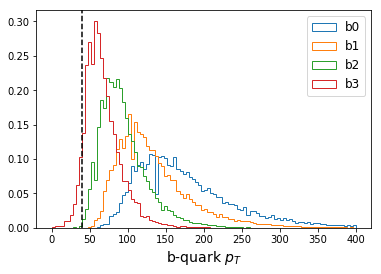

In [27]:
for i in range(4):
    plt.hist(SR['truth_b{}_pt'.format(i)],
             label='b{}'.format(i),histtype='step',
             bins=100,range=(0,400),weights=SR.mc_sf)
    
# Overlay the cut applied to the reco jet pT
_,ymax = plt.ylim()
plt.plot([40,40],[0,ymax],'k--')
plt.ylim(0,ymax)

plt.legend(fontsize=12)
plt.xlabel('b-quark $p_T$',fontsize=14)
plt.savefig('{}/{}truth_bs_pt.pdf'.format(figDir,treeName),bbox_inches='tight')
plt.show()

Ok, so I'm overlaying the cut applied to the reco jet $p_T$, but we know the reco jet $p_T$ tends to be lower for bs b/c of the semi-leptonic decay.


In [28]:
(SR['dr_match_max'] > R).sum()

5531

Just to know how to set the size of the histograms, it's good to know how how many events we're looking at.

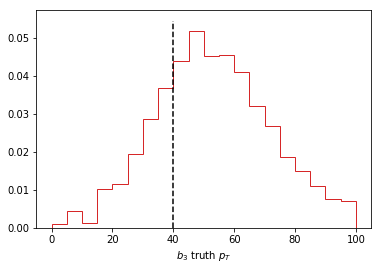

In [29]:
plt.hist(SR.loc[SR['dr_match_max'] > R,'truth_b3_pt'],
         bins=20,range=(0,100),color='C3',histtype='step',
         weights=SR.loc[SR['dr_match_max'] > R,'mc_sf'])

_,ymax = plt.ylim()
plt.plot([40,40],[0,ymax],'k--')
#plt.ylim(0,ymax)

plt.xlabel('$b_3$ truth $p_T$')
plt.savefig('{}/{}truth_b3_pt.pdf'.format(figDir,treeName),bbox_inches='tight')

plt.show()

**What does this mean?**

Ok, for probably about half of the events with reco jets that didn't have a truth match, it seems to be because of the truth b having a $p_T$ that's too low to pass the reco jet $p_T$ thresholds.

<tr>
<td> <img src="figures/Jannicke_preRegression.png" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="figures/JER_Topo_vs_PFlow.png" alt="Drawing" style="width: 350px;"/> </td>
</tr>

To gain a sense for whether the dashed black line should be above or below the reco $p_T$ cut of 40 GeV, I'm including [Jannicke's plot](https://indico.cern.ch/event/798175/contributions/3316956/attachments/1794944/2925575/draft_JP_12_02_19.pdf), which shows that reco $p_T$ is usually *softer* for b-jets. 
But note: Jannicke is comparing with the truth *jet* $p_T$, whereas I'm comparing with the truth b-quark.

Additionally, to estimate the size of the JER for Topo jets, I'm including the [JER for $p_T$](https://indico.cern.ch/event/777980/contributions/3236356/subcontributions/271401/attachments/1780062/2896765/JESJER.pdf), which shows there is normally a bigger correction for lower $p_T$ jets... or would I have to plot the JES to show this????

**Impact of the choice of the leading 4 mv2 jets**

So to simplify the problem, they just choose the 4 jets leading in mv2 discriminant, but I'm interested in seeing how often we missed a b using this choice.


In [30]:
# miniNtuple.columns
# miniNtuple.loc[miniNtuple.nresolvedJets == 6,['resolvedJets_pt','resolvedJets_MV2c10']]

The resolved jets are sorted by $p_T$, so I need resort by MV2 and take the $5^{th}$ leading jet in this MV2 discriminant. The `np.sort` function sorts in increasing order, so to reverse the sort, just use the np fancy indexing `[::-1]` which reverses the order of the list. 

For events that only have 4 jets, I'm going to set this MV2c10 to an unphysical value (-2, since MV2 is in the range \[-1,1\]) to mask these events for the plot I want to make!

In [31]:
val = [-2 if nj==4 else np.sort(miniNtuple.loc[ievt,rTag+'MV2c10'])[::-1][4] for ievt,nj in SR['njets'].iteritems()]

# Also, to have access to the pdg id of the 5th jet leading in MV2 disc, I need access to
# the index of the jet 5th leading in b-tag disc
ijet = [99 if nj==4 else np.argsort(miniNtuple.loc[ievt,rTag+'MV2c10'])[::-1][4] for ievt,nj in SR['njets'].iteritems()]

SR['j4_mv2'] = pd.Series(val,index=SR.index)  
SR['j4_idx'] = pd.Series(ijet,index=SR.index)

val = [-999 if nj==4 else miniNtuple.loc[ievt,rTag+'HadronConeExclTruthLabelID'][ij] for ievt,(nj,ij) in SR[['njets','j4_idx']].iterrows()]
SR['j4_pdg'] = pd.Series(val,index=SR.index)

In [32]:
nMisMatched = np.sum(SR['dr_match_max'] > R)
n4Jets = np.sum((SR['dr_match_max'] > R) & (SR['j4_mv2'] == -2))

print('Out of the {} events w/o matched jets, {} of them had only 4 jets'.format(nMisMatched,n4Jets))

Out of the 5531 events w/o matched jets, 1536 of them had only 4 jets


I'm not going to plot events with only 4 jets in this plot. 

In [33]:
mask = (SR['dr_match_max'] > R) & (SR['njets'] > 4)

In [34]:
#SR.loc[mask,['j4_mv2','j4_pdg']]

In [35]:
2/.17

11.76470588235294

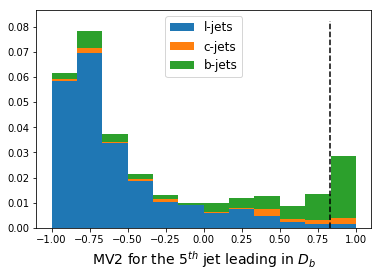

In [36]:
hists = [SR.loc[mask & (SR.j4_pdg == pdg),'j4_mv2'] for pdg in [0,4,5]]
ws = [SR.loc[mask & (SR.j4_pdg == pdg),'mc_sf'] for pdg in [0,4,5]]

plt.hist(hists, bins=12,range=(-1,1), label=['l-jets','c-jets','b-jets'],
         color=['C0','C1','C2'],stacked=True,weights = ws)

_,ymax = plt.ylim()
# Overlay the value for the 90% WP
plt.plot([0.83,0.83],[0,ymax],'k--')
#plt.ylim(0,ymax)

plt.legend(fontsize=12)

plt.xlabel('MV2 for the $5^{th}$ jet leading in $D_b$',fontsize=14)
plt.savefig('{}/{}_reco_jet5_mv2.pdf'.format(figDir,treeName),bbox_inches='tight')

plt.show()

This seems like a pretty big effect, as we can see that for these cases where we missed a jet, most of the time this was a **real b** that just wasn't leading in the MV2 discriminant.

To me, this seems like a prime application for a GNN where we could do the pairing without first having to select only 5 jets. Another thing that is pretty interesting in this graph is there are a lot of jets that are a lot of b-jets that have high MV2 values that didn't get tagged at the 70% WP. This seems to motivate using these looser WPs with pseudo-continuous b-tagging!


**Last intutition plot:**  How often does it seem to be that we have these situations where we have a miscalibration throwing off our jet axis?


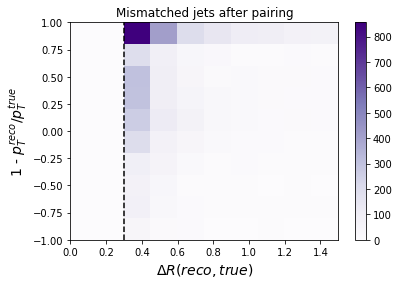

In [37]:
x = SR['dr_match_max'][SR['dr_match_max'] > R]
y = (1 - SR['reco_pt_mismatch']/SR['true_pt_mismatch'])[SR['dr_match_max'] > R]

nBins=10

xrange = [0, R/2*nBins]
yrange = [-1,np.max(y)]

plt.hist2d(x, y, bins=nBins, range=[xrange,yrange],cmap='Purples')
plt.colorbar()
plt.xlabel('$\Delta R (reco, true)$',fontsize=14)
plt.ylabel('1 - $p_T^{reco} / p_T^{true}$',fontsize=14)
plt.title('Mismatched jets after {}'.format('pairing' if treeName == 'afterPairing' else 'full analysis chain'))

plt.plot([R,R],yrange,'k--')

plt.savefig('{}/{}_closure_vs_dRmax.pdf'.format(figDir,treeName),bbox_inches='tight')

plt.show()

**Follow-up question:** For these cases where we pick up a "wrong-jet", does it more often go with the leading or the subleading HC?

In [38]:
SR['dr_match_max_hc1'] = pd.Series(np.max(SR[['dr_j0','dr_j1']].values,axis=-1),index=SR.index)
SR['dr_match_max_hc2'] = pd.Series(np.max(SR[['dr_j2','dr_j3']].values,axis=-1),index=SR.index)

In [39]:
print('HC1 missing b-jet in {:0.2f}% of events'.format(100*np.sum(SR['dr_match_max_hc1'] > R) / SR.index.shape[0]))
print('HC2 missing b-jet in {:0.2f}% of events'.format(100*np.sum(SR['dr_match_max_hc2'] > R) / SR.index.shape[0]))

HC1 missing b-jet in 3.01% of events
HC2 missing b-jet in 6.70% of events


In [40]:
6.3/2.3

2.739130434782609

So in answer to Michael's question, if we pick up a wrong jet, it's twice as likely to get assigned to the subleading HC.  This is interesting, because it's consistent with the story that I was uncovering in section 1 that the second HC is not as well constructed.

It might be inteesting to follow-up with unraveling how the HC mass is affected by the jet energy resolution versus this just picking the wrong jet.

**Study 3:**

How often do we pick up the correct versus the incorrect pairing?

a) Match the HC to the correct truth higgses. I'm doing this with a $\Delta R$ match right now, so first I need to santiy check this step.


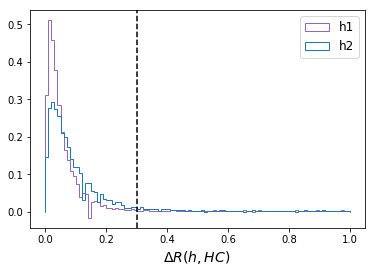

In [41]:
for h,c in zip(['h1','h2'],['C4','C0']):
    plt.hist(SR['dr_reco_true_'+h], weights=SR.mc_sf,
             bins=100,range=(0,1), 
             label=h, 
             color=c,histtype='step')
plt.xlabel('$\Delta R(h,HC)$ ',fontsize=14)
plt.legend(fontsize=12)

ylim = plt.ylim()
plt.plot([R,R],ylim,'k--')
plt.ylim(ylim)

plt.show()

Need to modify these studies to properly account for the tails when it seems like we don-t have a well constructed HC.

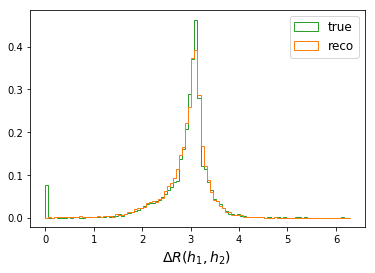

In [42]:
for t,c in zip(['true','reco'],['C2','C1']):
    plt.hist(SR['dr_{}_h1_h2'.format(t)], weights=SR.mc_sf,
             bins=100,range=(0,2*np.pi), 
             label=t, 
             color=c,histtype='step')
plt.xlabel('$\Delta R(h_1,h_2)$ ',fontsize=14)
plt.legend(fontsize=12)
plt.show()

For this 500 GeV resonance, the Higgses are pretty back to back, and the truth matches with reco pretty nicely!

But this is good, because when I coded this up, I was worried that I was going to have the same truth Higgs getting assigned to both reco particles, and this is clearly not the case since there aren't events at 0.


In [43]:
# I don't think I understand what is going into this formula lol
2*500 / 50

20.0

b) Check the match of b-jets to truth b-quarks

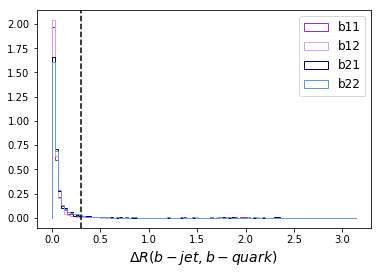

In [44]:
for b,c in zip(['b11','b12','b21','b22'],['darkorchid','plum','navy','cornflowerblue']):
    plt.hist(SR['dr_reco_true_'+b], weights=SR.mc_sf,
             bins=100,range=(0,np.pi), label=b, 
             color=c,histtype='step')
plt.xlabel('$\Delta R(b-jet,b-quark)$ ',fontsize=14)
plt.legend(fontsize=12)

ylim = plt.ylim()
plt.plot([R,R],ylim,'k--')
plt.ylim(ylim)

plt.show()

Cool! Most of the time the pairing is right!!

In [45]:
dr_cols = ['dr_reco_true_b11','dr_reco_true_b12','dr_reco_true_b21','dr_reco_true_b22']
SR['dr_match_max_hc_const'] = pd.Series(np.max(SR[dr_cols].values,axis=-1),index=SR.index)

In [49]:
#print("Wrong pairing in {}% of UNWEIGHTED events".format(100 * np.sum(SR['dr_match_max_hc_const'] > R) / SR.index.shape[0]))
print("Wrong pairing in {}% of WEIGHTED events".format(100 * np.sum(SR.loc[SR['dr_match_max_hc_const'] > R,'mc_sf']) / SR.mc_sf.sum()))

Wrong pairing in 18.906323841558144% of WEIGHTED events


In [50]:
num_mask = (SR['dr_match_max_hc_const'] > R) & (SR['dr_match_max'] < R)
den_mask = (SR['dr_match_max'] < R)

#print("Wrong pairing in {}% of UNWEIGHTED events with correct b-jets".format(100 * num_mask.sum() / den_mask.sum()))
print("Wrong pairing in {}% of WEIGHTED events with correct b-jets".format(100 * SR.loc[num_mask,'mc_sf'].sum() / SR.loc[den_mask,'mc_sf'].sum()))

Wrong pairing in 5.350591087397353% of WEIGHTED events with correct b-jets


**Lesson:** So to do better at accepting the signal, it's not so much the pairing alg that we want to improve as the selection of the correct jets. But this is consistent with the SM cutflow from the internal note, that we only have a 5% signal acceptance after selecting 4 high $p_T$ b-tagged jets. 

**Where could we improve?**
1. Use a track jet for the $4^{th}$ jet that could allow us to lower the $p_T$ threshold.
2. Use a GNN which can do the jet selection and the pairing at the same time. Since we calibrate b-tagging in 5 different WP bins, I shouldn't pass the raw b-tagging discriminant value, but I think I could pass an int from 0-4 for which b-tagging bin it lies in.


**Study 4:**

To get an intuition for how separated the constituents of these HCs are, plot $\Delta R (b_{11}, b_{22})$, at the reco level.

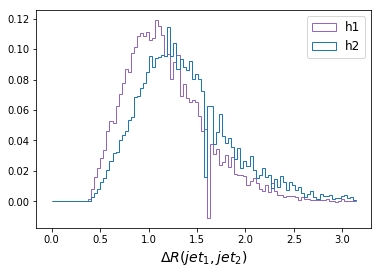

In [48]:
for key,h,c in zip(['dr_reco_b11_b12','dr_reco_b21_b22'],['h1','h2'],['C4','C0']):
    plt.hist(SR[key], weights=SR.mc_sf,
             bins=100,range=(0,np.pi), 
             label=h, 
             color=c,histtype='step')
plt.xlabel('$\Delta R(jet_1,jet_2)$ ',fontsize=14)
plt.legend(fontsize=12)
plt.savefig('{}/{}_dr_reco_constJets.pdf'.format(figDir,treeName),bbox_inches='tight')
plt.show()

- The leading HC has it's constituents slightly closer, as expected since $\Delta R \leq \frac{2m}{p_T}$
- There's a cutoff in the resolved case, the jet centers can never be closer than 0.4, since otherwise they would be merged by the anti-$k_T$ alg